<a href="https://colab.research.google.com/github/juanjosemarinm/SyS2025-2/blob/main/talle_parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **2. Transformada de laplace**

## 2.1 consultar y realizar los ejercicios propuestos en el cuaderno de colab convolucion

##1. En el cuarto paso, la evaluación de las integrales de convolución para los tres casos se deja abierta como un ejercicio. Tenga en cuenta que, en el primer caso, no se superponen, es decir que y(t) = 0 para t < 0.

###**solucion**  
<br>

El ejercicio consiste en calcular la integral de convolución $y(t) = x(t) * h(t)$ para las señales definidas.

## 1. Definición de las Señales

tenemos:
* $x(t) = \text{rect}(t - 1/2)$, que es un pulso rectangular de amplitud 1 entre $t=0$ y $t=1$.
* $h(t) = e^{-t} u(t)$ , una exponencial decreciente que es 0 para $t<0$.

## 2. Planteamiento de la Integral

La integral de convolución es:
$$y(t) = \int_{-\infty}^{\infty} x(\tau) \cdot h(t - \tau) \; d\tau$$

Para resolverla, seguimos los pasos:

1.  **Sustitución:**
    * $x(\tau)$ es 1 si $0 \leq \tau \leq 1$, y 0 en cualquier otro caso.
    * $h(\tau) = e^{-\tau} u(\tau)$

2.  **Desplazamiento (para $h(\tau)$):**
    * $h(-\tau) = e^{\tau} u(-\tau)$
    * $h(t - \tau) = e^{-(t-\tau)} u(t - \tau) = e^{-t}e^{\tau} u(t - \tau)$

    La función $u(t - \tau)$ (escalón unitario) es 1 solo si $t - \tau \geq 0$, es decir, si **$\tau \leq t$**.

3.  **Sustitución en la Integral:**
    Sustituimos $x(\tau)$ (que limita los bornes de integración de 0 a 1) y $h(t-\tau)$:
    $$y(t) = \int_{0}^{1} 1 \cdot \left( e^{-t}e^{\tau} u(t - \tau) \right) \; d\tau$$

    Como $e^{-t}$ es una constante respecto a $\tau$, podemos sacarla de la integral:
    $$y(t) = e^{-t} \int_{0}^{1} e^{\tau} u(t - \tau) \; d\tau$$

Ahora, resolvemos esta integral analizando los tres casos de traslape. El resultado depende de dónde se sitúe $t$ (el borde de $u(t-\tau)$) respecto a la ventana de integración $[0, 1]$.


### Caso 1: $t < 0$ (Sin traslape)

* La ventana de integración es $\tau \in [0, 1]$.
* La condición para que $u(t-\tau)$ sea 1 es $\tau \leq t$.
* Dado que $t < 0$, la condición $\tau \leq t$ nunca se cumple dentro de la ventana $[0, 1]$.
* El integrando $e^{\tau} u(t - \tau)$ es **0** en todo el intervalo de integración.

$$y(t) = e^{-t} \int_{0}^{1} 0 \; d\tau = \mathbf{0}$$

### Caso 2: $0 \leq t < 1$ (Traslape parcial)

* La ventana de integración es $\tau \in [0, 1]$.
* La condición es $\tau \leq t$.
* La integral es no nula solo en la intersección de $[0, 1]$ y $(-\infty, t]$.
* Como $0 \leq t < 1$, la intersección es el intervalo **$[0, t]$**.
* Por lo tanto, los límites de la integral cambian:

$$y(t) = e^{-t} \int_{0}^{t} e^{\tau} \cdot 1 \; d\tau$$
$$y(t) = e^{-t} \left[ e^{\tau} \right]_{0}^{t}$$
$$y(t) = e^{-t} (e^{t} - e^{0})$$
$$y(t) = e^{-t} (e^{t} - 1)$$
$$y(t) = \mathbf{1 - e^{-t}}$$

### Caso 3: $t \geq 1$ (Traslape completo)

* La ventana de integración es $\tau \in [0, 1]$.
* La condición es $\tau \leq t$.
* Dado que $t \geq 1$, la condición $\tau \leq t$ se cumple para **todo** el intervalo de integración $[0, 1]$.
* Los límites de la integral se mantienen como $[0, 1]$:

$$y(t) = e^{-t} \int_{0}^{1} e^{\tau} \cdot 1 \; d\tau$$
$$y(t) = e^{-t} \left[ e^{\tau} \right]_{0}^{1}$$
$$y(t) = e^{-t} (e^{1} - e^{0})$$
$$y(t) = e^{-t} (e - 1)$$
$$y(t) = \mathbf{(e - 1)e^{-t}}$$

---

## Resultado Final

La convolución $y(t)$ es una función definida por partes:

$$
y(t) = \begin{cases}
    0 & \text{si } t < 0 \\
    1 - e^{-t} & \text{si } 0 \leq t < 1 \\
    (e - 1)e^{-t} & \text{si } t \geq 1
\end{cases}
$$

## 2.2 consultar y realizar los ejercicios propuestos en el cuaderno de colab respuesta impuslo

## 1. Compare la señal de salida obtenida al resolver la EDO con la obtenida mediante la convolución. Son iguales?

###**solucion**


* **Método 1 (Solución EDO):** El *notebook* resolvió la EDO $\frac{d}{dt} y(t) + y(t) = x(t)$ con la entrada $x(t) = e^{-2t} \epsilon(t)$ y obtuvo: $y_1(t) = (1 - e^{-t})e^{-t} \theta(t)$, que al expandirse es: $y_1(t) = (e^{-t} - e^{-2t}) \theta(t)$

* **Método 2 (Convolución):** El *notebook* calculó la convolución $y(t) = x(t) * h(t)$ y obtuvo: $y_2(t) = e^{-t} - e^{-2t}$ (Esta solución es válida para $t \ge 0$, ya que la convolución de dos señales causales es también causal, por lo que se asume multiplicada por $\theta(t)$).


Ambos métodos producen el mismo resultado: $y(t) = (e^{-t} - e^{-2t}) \theta(t)$.

<br>

## 2.  Compruebe la solución $h(t)$ de la EDO cuando $x(t) = \delta(t)$ de manera manual. Tener en cuenta que $\frac{d}{dt} \epsilon(t) = \delta(t)$.

###**solucion**
<br>

Debemos resolver manualmente la EDO para $x(t) = \delta(t)$, asumiendo condiciones iniciales nulas.

La ecuación es:
$$\frac{d}{dt} h(t) + h(t) = \delta(t)$$

Para resolver esto, primero encontramos la **solución homogénea** ($h_h(t)$) para $t > 0$ (después del impulso):
$$\frac{dh_h}{dt} + h_h = 0 \implies \frac{dh_h}{h_h} = -dt$$
Integrando ambos lados:
$$\ln(h_h) = -t + C_1 \implies h_h(t) = C e^{-t}$$

Ahora, encontramos la condición inicial en $t=0^+$ causada por el impulso. Integramos la EDO completa alrededor de $t=0$ (de $0^-$ a $0^+$):
$$\int_{0^-}^{0^+} \frac{d}{dt} h(t) dt + \int_{0^-}^{0^+} h(t) dt = \int_{0^-}^{0^+} \delta(t) dt$$

Analizamos cada término:
1.  $\int_{0^-}^{0^+} \frac{d}{dt} h(t) dt = h(0^+) - h(0^-)$
2.  $\int_{0^-}^{0^+} h(t) dt = 0$ (La integral de una función finita en un intervalo infinitesimal es cero).
3.  $\int_{0^-}^{0^+} \delta(t) dt = 1$ (Por definición de la integral del impulso).

Asumimos que el sistema está en reposo, por lo que $h(0^-) = 0$. La ecuación se convierte en:
$$(h(0^+) - 0) + 0 = 1 \implies h(0^+) = 1$$

Finalmente, usamos esta condición inicial $h(0^+) = 1$ en la solución homogénea $h_h(t) = C e^{-t}$:
$$h(0^+) = C e^{-0} = 1 \implies C = 1$$

La solución para $t>0$ es $e^{-t}$. Combinando esto con la causalidad (es 0 para $t<0$), obtenemos la respuesta al impulso completa:
$$h(t) = e^{-t} \epsilon(t)$$
(Donde $\epsilon(t)$ es la función escalón de Heaviside, denotada como $\theta(t)$ en `SymPy`).

**Comprobación:** El resultado coincide exactamente con el obtenido por `SymPy`

<br>

## 3. Comprobar la solución de la integral de convolución de manera manual. Tener en cuenta las funciones Heaviside.

###**solucion**
<br>

Debemos resolver manualmente $y(t) = x(t) * h(t)$.

* $x(t) = e^{-2t} \epsilon(t)$
* $h(t) = e^{-t} \epsilon(t)$ (calculada arriba)

La integral de convolución es:
$$y(t) = \int_{-\infty}^{\infty} x(\tau) \cdot h(t - \tau) \; d\tau$$
$$y(t) = \int_{-\infty}^{\infty} [e^{-2\tau} \epsilon(\tau)] \cdot [e^{-(t-\tau)} \epsilon(t - \tau)] \; d\tau$$

Los escalones $\epsilon(\tau)$ y $\epsilon(t-\tau)$ definen los límites de integración:
1.  $\epsilon(\tau) = 1$ solo si $\tau \ge 0$. El límite inferior se vuelve 0.
2.  $\epsilon(t-\tau) = 1$ solo si $t - \tau \ge 0 \implies \tau \le t$. El límite superior se vuelve $t$.

(Esta integral solo es no nula para $t \ge 0$, lo cual es consistente con la nota del *notebook*).

La integral se simplifica a:
$$y(t) = \int_{0}^{t} e^{-2\tau} \cdot e^{-(t-\tau)} \; d\tau$$
$$y(t) = \int_{0}^{t} e^{-2\tau} \cdot e^{-t} \cdot e^{\tau} \; d\tau$$

Sacamos $e^{-t}$ fuera de la integral (es constante respecto a $\tau$):
$$y(t) = e^{-t} \int_{0}^{t} e^{-2\tau} \cdot e^{\tau} \; d\tau$$
$$y(t) = e^{-t} \int_{0}^{t} e^{-\tau} \; d\tau$$

Resolvemos la integral definida:
$$y(t) = e^{-t} \left[ -e^{-\tau} \right]_{0}^{t}$$
$$y(t) = e^{-t} \left[ (-e^{-t}) - (-e^{-0}) \right]$$
$$y(t) = e^{-t} \left[ -e^{-t} + 1 \right]$$

Distribuimos $e^{-t}$:
$$y(t) = e^{-t} - e^{-2t}$$

**Comprobación:** El resultado manual $y(t) = e^{-t} - e^{-2t}$ (para $t \ge 0$) coincide exactamente con el obtenido por `SymPy` en el *notebook*.

## 2.3 Demuestre si los siguientes sistemas de la forma $y = \mathcal{H}\{x\}$, son sistemas lineales e invariantes en el tiempo (SLIT) (simule los sistemas en Python):

* $y[n] = x[n]/3 + 2x[n-1] - y[n-1]$.
* $y[n] = \sum_{k=-\infty}^{n} x^2[k]$.
* $y[n] = \text{median}(x[n])$; donde median es la función mediana sobre una ventana de tamaño 3.
* $y(t) = Ax(t) + B; A, B \in \mathbb{R}$.

###**solucion**

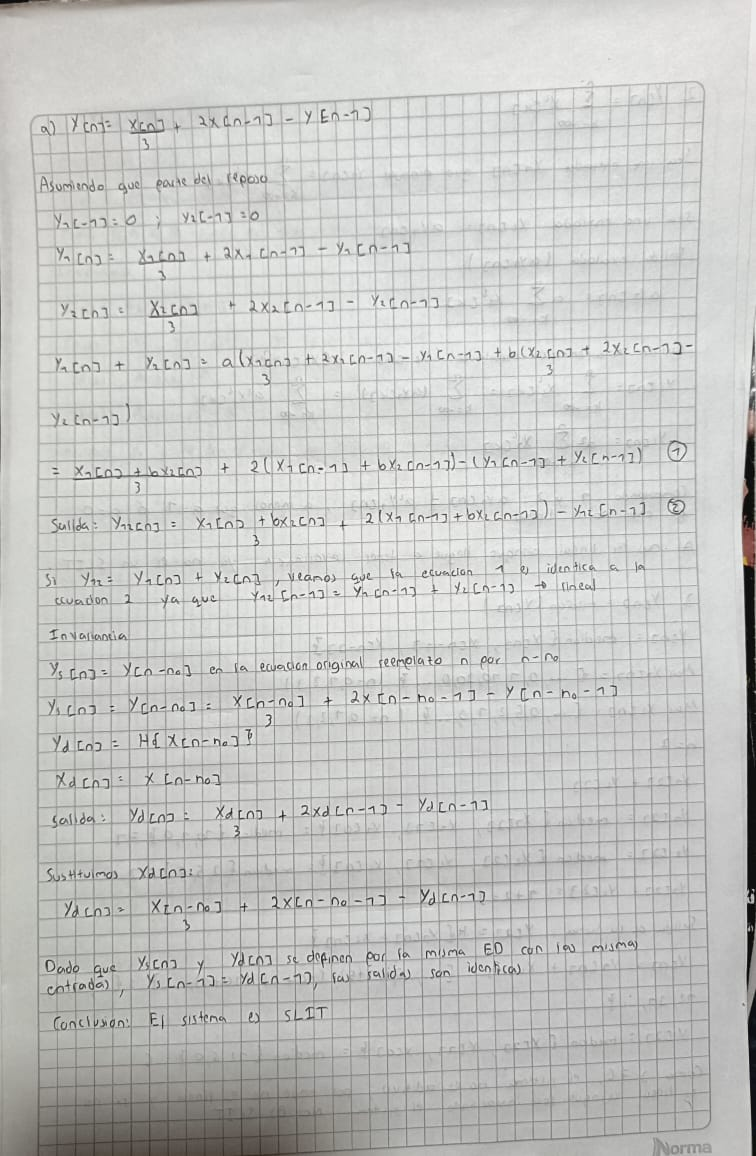

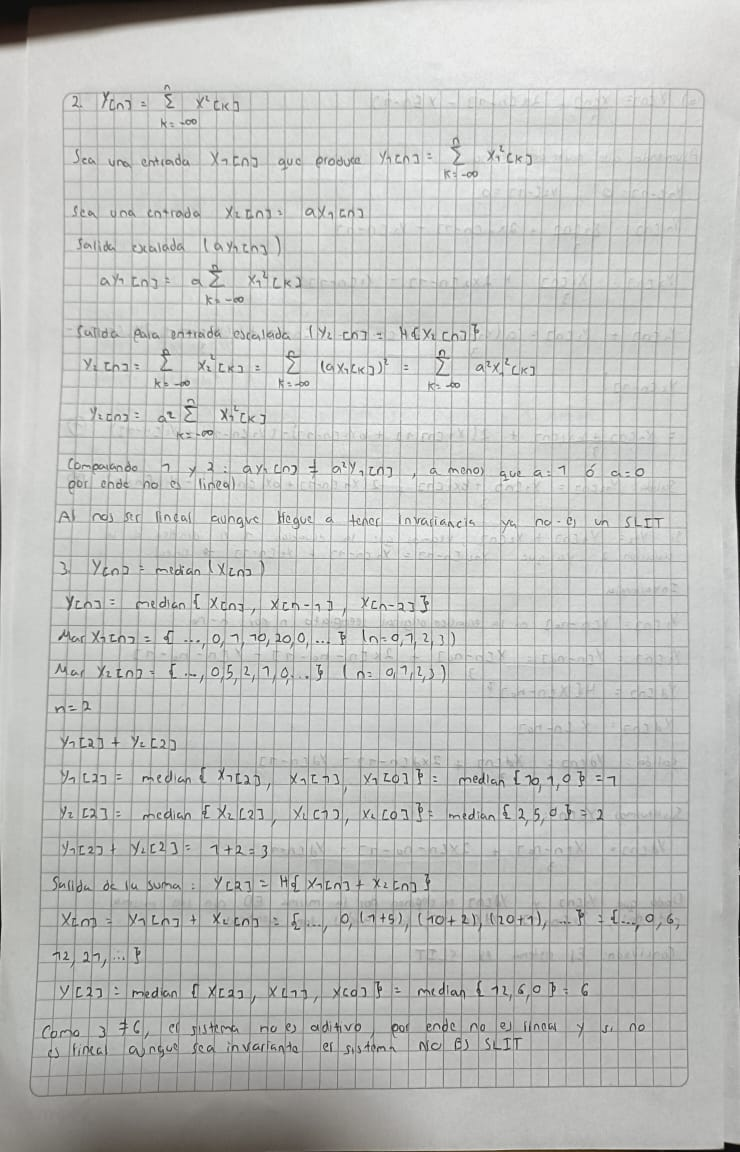

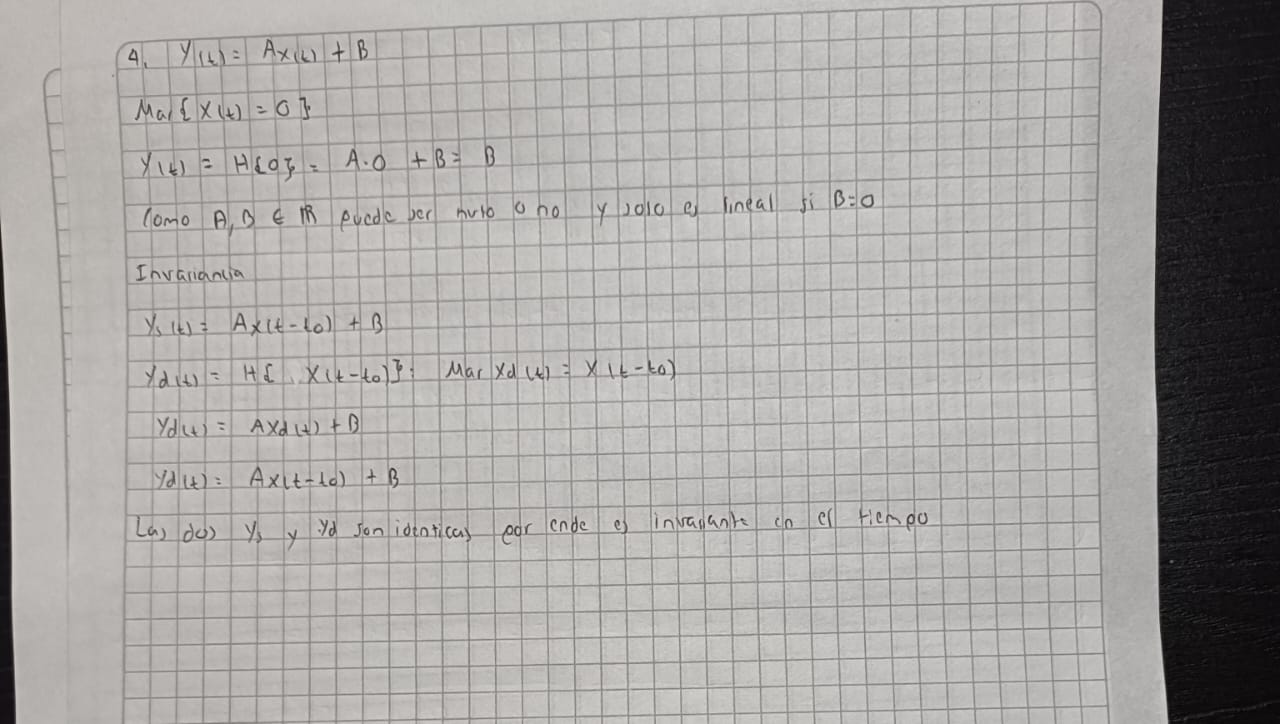

###SIMULACION

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter, medfilt

# --- Configuración de las Señales de Prueba ---
N = 100  # Longitud de la señal
n = np.arange(N)

# Señales para prueba de Linealidad
a = 0.5
b = -1.2
x1 = np.sin(2 * np.pi * 0.05 * n) + np.cos(2 * np.pi * 0.1 * n)
x2 = np.random.rand(N) * 2 - 1

# Señal para prueba de Invariancia en el Tiempo (un impulso)
n0 = 10  # Desplazamiento
x_ti = np.zeros(N)
x_ti[20] = 1 # Impulso en n=20
x_ti_shifted = np.roll(x_ti, n0) # Impulso desplazado a n=30

# --- Función Auxiliar para Graficar ---
def plot_test(n, y1, y2, title, test_type):
    plt.figure(figsize=(10, 4))
    plt.plot(n, y1, 'b-', label='Resultado 1: ' + test_type[0], alpha=0.7)
    plt.plot(n, y2, 'r--', label='Resultado 2: ' + test_type[1], alpha=0.7)
    plt.title(title)
    plt.xlabel('n')
    plt.ylabel('Amplitud')
    plt.legend()
    plt.grid(True)

    # Comprobar si son (casi) iguales
    if np.allclose(y1, y2):
        print(f" PASA: Los resultados de la prueba '{title}' son idénticos.")
    else:
        print(f" FALLA: Los resultados de la prueba '{title}' son diferentes.")
    plt.show()

--- Sistema 1: y[n] = x[n]/3 + 2x[n-1] - y[n-1] ---
 PASA: Los resultados de la prueba 'Prueba de Linealidad (Sistema 1)' son idénticos.


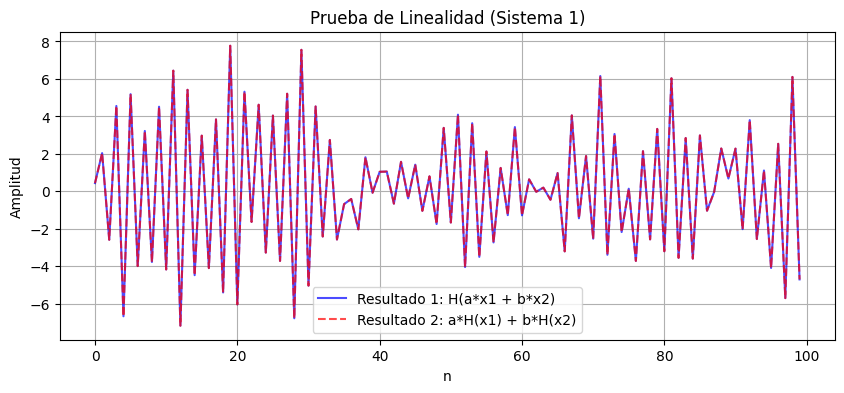

 PASA: Los resultados de la prueba 'Prueba de Invariancia en el Tiempo (Sistema 1 ' son idénticos.


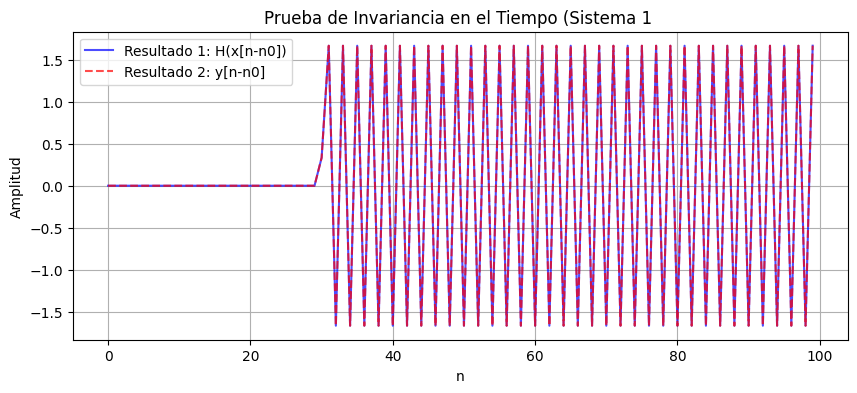

Conclusión Sistema 1: Es Lineal e Invariante en el Tiempo (SLIT).


In [12]:
print("--- Sistema 1: y[n] = x[n]/3 + 2x[n-1] - y[n-1] ---")
# Ecuación de coeficientes: y[n] + y[n-1] = (1/3)x[n] + 2x[n-1]
a_coeffs = [1, 1]
b_coeffs = [1/3, 2]

def H1(x):
    return lfilter(b_coeffs, a_coeffs, x)

# Prueba de Linealidad
y_out_sum = H1(a * x1 + b * x2)
y_sum_out = a * H1(x1) + b * H1(x2)
plot_test(n, y_out_sum, y_sum_out,
          "Prueba de Linealidad (Sistema 1)",
          ["H(a*x1 + b*x2)", "a*H(x1) + b*H(x2)"])

# --- Corrección de la Prueba de Invariancia en el Tiempo (Sistema 1) ---

# 1. Salida para la ENTRADA desplazada (H{x[n-n0]})
y_out_shift = H1(x_ti_shifted)

# 2. SALIDA original (y[n]), desplazada (y[n-n0])
y_original = H1(x_ti) # Esta es y[n]
y_shifted = np.zeros(N) # Creamos un vector de ceros

# Insertamos la respuesta original, pero desplazada n0 posiciones
# Nos aseguramos de no "dar la vuelta" (wrap-around)
if n0 >= 0:
    y_shifted[n0:] = y_original[:N-n0]
else:
    # Opcional: Manejar adelanto en el tiempo si n0 es negativo
    y_shifted[:N+n0] = y_original[-n0:]

# Graficamos la prueba corregida
plot_test(n, y_out_shift, y_shifted,
          "Prueba de Invariancia en el Tiempo (Sistema 1 ",
          ["H(x[n-n0])", "y[n-n0]"])

print("Conclusión Sistema 1: Es Lineal e Invariante en el Tiempo (SLIT).")


--- Sistema 2: y[n] = Acumulador de x^2[k] ---
 FALLA: Los resultados de la prueba 'Prueba de Linealidad (Sistema 2)' son diferentes.


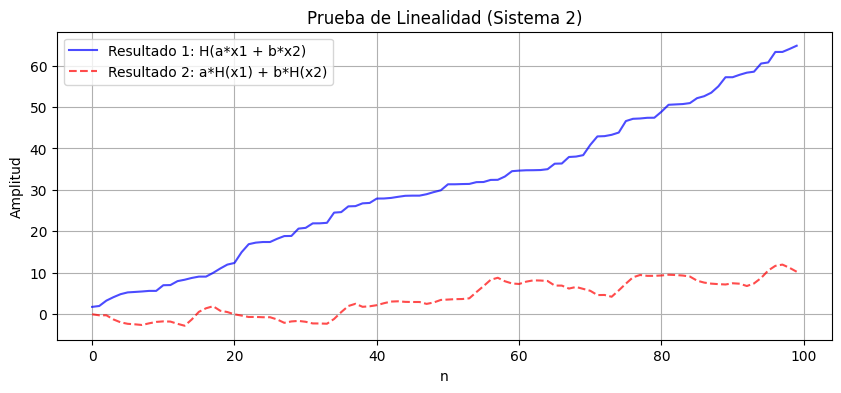

 FALLA: Los resultados de la prueba 'Prueba de Invariancia en el Tiempo (Sistema 2)' son diferentes.


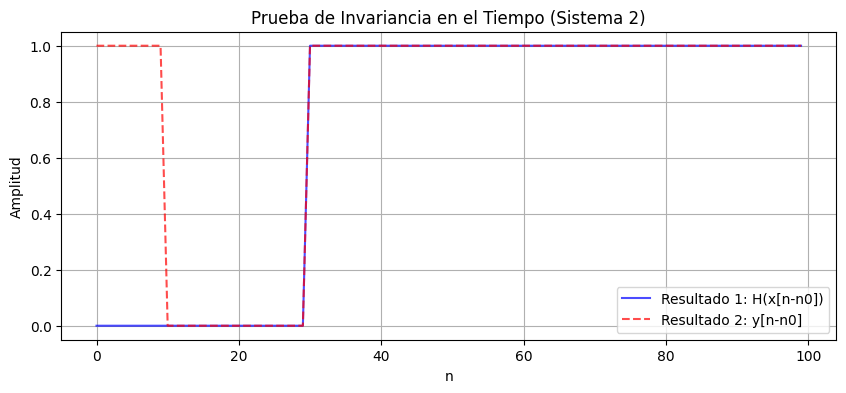

Conclusión Sistema 2: Es Invariante en el Tiempo, pero NO es Lineal.


In [8]:
print("\n--- Sistema 2: y[n] = Acumulador de x^2[k] ---")

def H2(x):
    # El acumulador (sum_{k=-inf}^{n}) es np.cumsum
    return np.cumsum(x**2)

# Prueba de Linealidad
y_out_sum = H2(a * x1 + b * x2)
y_sum_out = a * H2(x1) + b * H2(x2)
plot_test(n, y_out_sum, y_sum_out,
          "Prueba de Linealidad (Sistema 2)",
          ["H(a*x1 + b*x2)", "a*H(x1) + b*H(x2)"])

# Prueba de Invariancia en el Tiempo
y_out_shift = H2(x_ti_shifted)
y_shifted = np.roll(H2(x_ti), n0)
plot_test(n, y_out_shift, y_shifted,
          "Prueba de Invariancia en el Tiempo (Sistema 2)",
          ["H(x[n-n0])", "y[n-n0]"])

print("Conclusión Sistema 2: Es Invariante en el Tiempo, pero NO es Lineal.")


--- Sistema 3: y[n] = Filtro de Mediana (ventana 3) ---
 FALLA: Los resultados de la prueba 'Prueba de Linealidad (Sistema 3)' son diferentes.


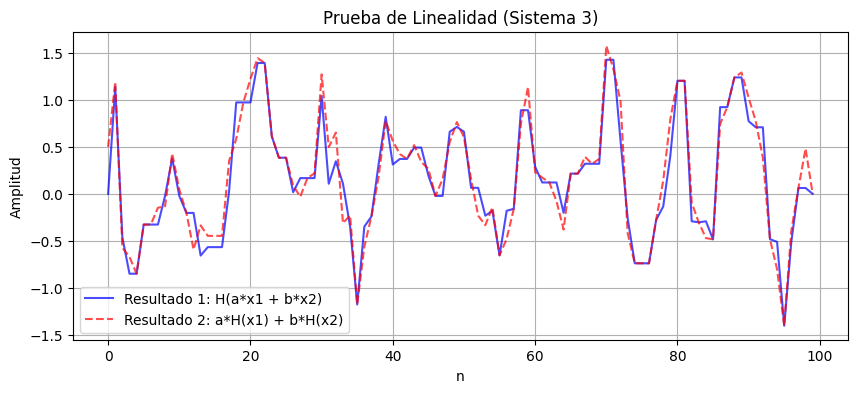

 PASA: Los resultados de la prueba 'Prueba de Invariancia en el Tiempo (Sistema 3)' son idénticos.


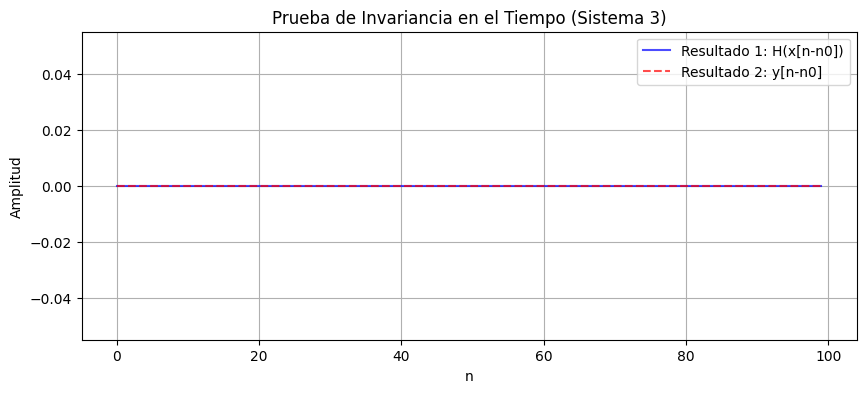

Conclusión Sistema 3: Es Invariante en el Tiempo, pero NO es Lineal.


In [9]:
print("\n--- Sistema 3: y[n] = Filtro de Mediana (ventana 3) ---")

def H3(x):
    # Usamos el filtro de mediana de scipy con tamaño 3
    return medfilt(x, kernel_size=3)

# Prueba de Linealidad
y_out_sum = H3(a * x1 + b * x2)
y_sum_out = a * H3(x1) + b * H3(x2)
plot_test(n, y_out_sum, y_sum_out,
          "Prueba de Linealidad (Sistema 3)",
          ["H(a*x1 + b*x2)", "a*H(x1) + b*H(x2)"])

# Prueba de Invariancia en el Tiempo
y_out_shift = H3(x_ti_shifted)
y_shifted = np.roll(H3(x_ti), n0)
plot_test(n, y_out_shift, y_shifted,
          "Prueba de Invariancia en el Tiempo (Sistema 3)",
          ["H(x[n-n0])", "y[n-n0]"])

print("Conclusión Sistema 3: Es Invariante en el Tiempo, pero NO es Lineal.")


--- Sistema 4: y[n] = Ax[n] + B ---
 FALLA: Los resultados de la prueba 'Prueba de Linealidad (Sistema 4)' son diferentes.


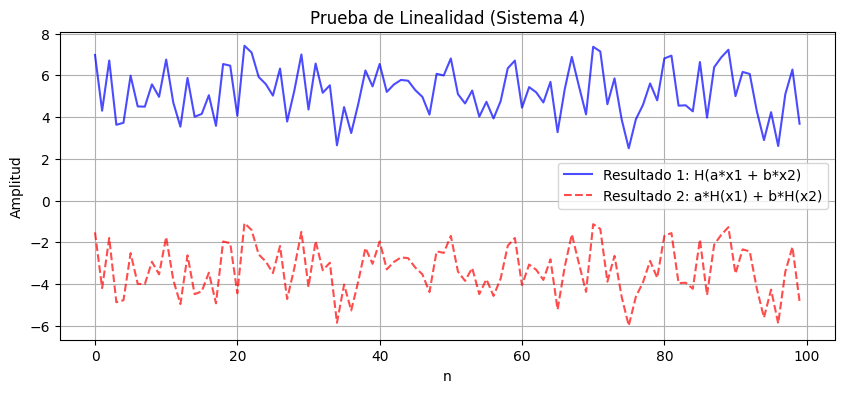

 PASA: Los resultados de la prueba 'Prueba de Invariancia en el Tiempo (Sistema 4)' son idénticos.


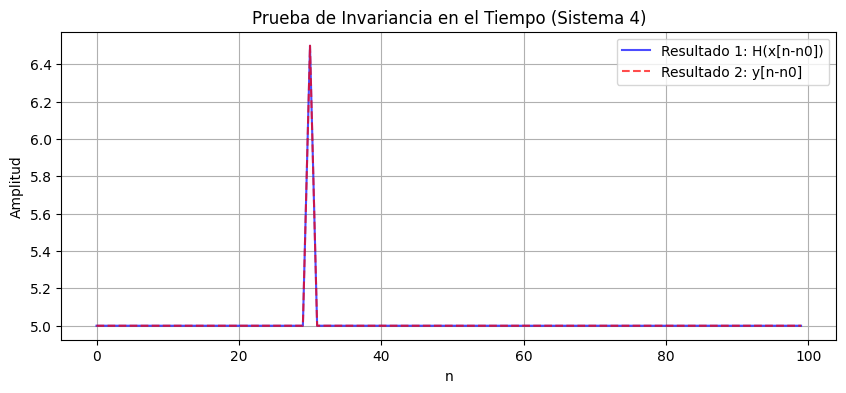

Conclusión Sistema 4: Es Invariante en el Tiempo, pero NO es Lineal (porque B=5.0 no es cero).


In [10]:
print("\n--- Sistema 4: y[n] = Ax[n] + B ---")
A = 1.5
B = 5.0  # Este offset 'B' es el que rompe la linealidad

def H4(x):
    return A * x + B

# Prueba de Linealidad
y_out_sum = H4(a * x1 + b * x2)
y_sum_out = a * H4(x1) + b * H4(x2)
plot_test(n, y_out_sum, y_sum_out,
          "Prueba de Linealidad (Sistema 4)",
          ["H(a*x1 + b*x2)", "a*H(x1) + b*H(x2)"])

# Prueba de Invariancia en el Tiempo
y_out_shift = H4(x_ti_shifted)
y_shifted = np.roll(H4(x_ti), n0)
plot_test(n, y_out_shift, y_shifted,
          "Prueba de Invariancia en el Tiempo (Sistema 4)",
          ["H(x[n-n0])", "y[n-n0]"])

print(f"Conclusión Sistema 4: Es Invariante en el Tiempo, pero NO es Lineal (porque B={B} no es cero).")

##2.4 Hallar la salida $y[n]$ de un SLIT ante la entrada $x[n]=\{-15, 5, -3^\dagger, 0, 5, 7, -1\}$, con respuesta al impulso $h[n]=\{1, -2, 0^\dagger, 1, -2\}$, donde $n \in \{0, \pm 1, \pm 2, \dots, \pm N \}$ y $n=0$ para $x[n]^\dagger$. Nota: Utilizar método gráfico para encontrar la salida y comprobar con simulación en Python. Ver cuaderno Convolución discreta. Repita el proceso para el sistema con respuesta al escalón $\{-1, 6, -10, 3^\dagger, 1, -10, 2, 5\}$.

###**solucion**

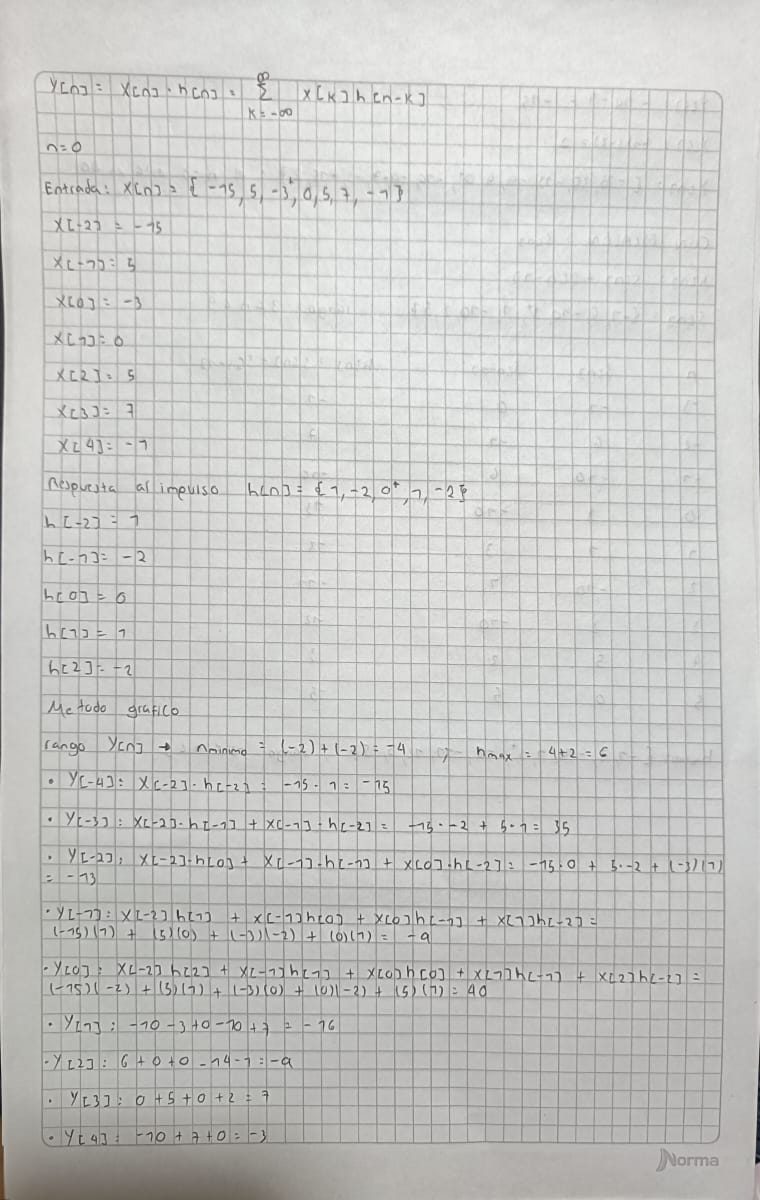

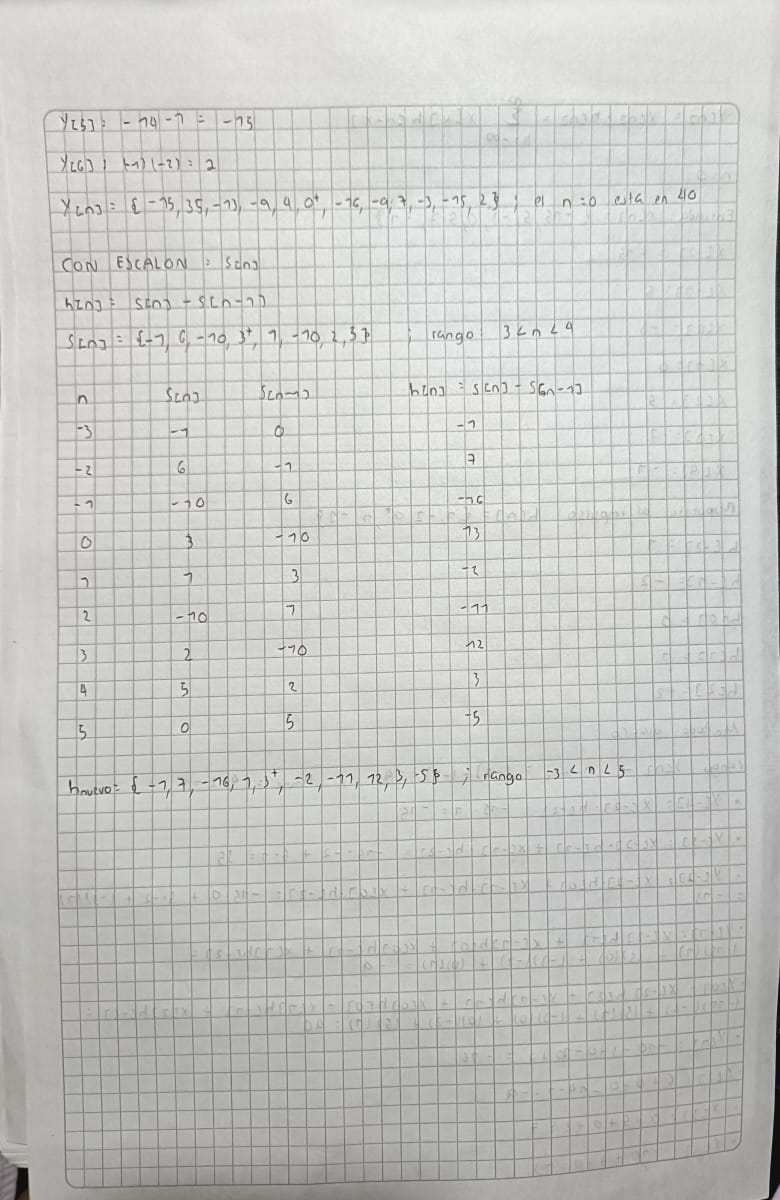

##SIMULACION DE LA PRIMERA PARTE DEL 2.4


In [13]:
import numpy as np

# Definir las señales como arrays de NumPy
# x[n] = {-15, 5, -3, 0, 5, 7, -1}
x_n = np.array([-15, 5, -3, 0, 5, 7, -1])

# h[n] = {1, -2, 0, 1, -2}
h_n = np.array([1, -2, 0, 1, -2])

# Calcular la convolución
y_n = np.convolve(x_n, h_n)

print(f"Entrada x[n]: {x_n}")
print(f"Respuesta Impulso h[n]: {h_n}")
print(f"Salida y[n]: {y_n}")

# Rango de n para x[n]: -2 a 4
# Rango de n para h[n]: -2 a 2
# Rango de n para y[n]: -4 a 6
n_y = np.arange(-4, 6 + 1)
print(f"Rango de n para y[n]: {n_y}")
# El n=0 está en el índice 4 (el valor 40)
print(f"Valor en n=0: {y_n[4]}")

Entrada x[n]: [-15   5  -3   0   5   7  -1]
Respuesta Impulso h[n]: [ 1 -2  0  1 -2]
Salida y[n]: [-15  35 -13  -9  40 -16  -9   7  -3 -15   2]
Rango de n para y[n]: [-4 -3 -2 -1  0  1  2  3  4  5  6]
Valor en n=0: 40


##SIMULACION DE LA SEGUNDA PARTE DEL PUNTO 2.4

El "proceso" es repetir la convolución$y[n] = x[n] * h_{nueva}[n]$. El método gráfico manual sería idéntico al de la Parte 1, pero mucho más largo (la señal de salida tendrá$7 + 9 - 1 = 15$).

Comprobaremos el resultado directamente con la simulación en Python.

In [14]:
import numpy as np

# Señal de entrada (la misma de antes)
x_n = np.array([-15, 5, -3, 0, 5, 7, -1])

# Respuesta al escalón s[n]
s_n = np.array([-1, 6, -10, 3, 1, -10, 2, 5])

# 1. Encontrar h[n] a partir de s[n]
# Usamos np.diff, anteponiendo un 0 a s[n] (s[-4]=0)
h_nueva_n = np.diff(s_n, prepend=0)

print(f"Respuesta al escalón s[n]: {s_n}")
print(f"Nueva respuesta al impulso h[n]: {h_nueva_n}")

# 2. Calcular la nueva convolución
y_nueva_n = np.convolve(x_n, h_nueva_n)

print(f"Nueva salida y[n]: {y_nueva_n}")

# Rango de n para x[n]: -2 a 4
# Rango de n para h[n]: -3 a 5
# Rango de n para y[n]: -5 a 9
n_y_nueva = np.arange(-5, 9 + 1)
print(f"Rango de n para y[n]: {n_y_nueva}")
# El n=0 está en el índice 5
print(f"Valor en n=0: {y_nueva_n[5]}")

Respuesta al escalón s[n]: [ -1   6 -10   3   1 -10   2   5]
Nueva respuesta al impulso h[n]: [ -1   7 -16  13  -2 -11  12   3]
Nueva salida y[n]: [  15 -110  278 -296  138  144 -259   -6   76  -91  -15  110    9   -3]
Rango de n para y[n]: [-5 -4 -3 -2 -1  0  1  2  3  4  5  6  7  8  9]
Valor en n=0: 144


##2.5 Sea la señal Gaussiana $x(t) = e^{-at^2}$ con $a \in \mathbb{R}^+$, el sistema $A$ con relación entrada-salida $y_A(t) = x^2(t)$, y el sistema lineal e invariante con el tiempo $B$ con respuesta al impulso $h_B(t) = Be^{-bt^2} :$

a) Encuentre la salida del sistema en serie $x(t) \rightarrow h_B(t) \rightarrow y_A(t) \rightarrow y(t)$

b) Encuentre la salida del sistema en serie $x(t) \rightarrow y_A(t) \rightarrow h_B(t) \rightarrow y(t)$.

###**solucion**



Este problema requiere la **identidad de convolución Gaussiana**. La convolución de dos señales Gaussianas es otra Gaussiana:

 **Identidad:** $(e^{-\alpha t^2}) * (e^{-\beta t^2}) = \sqrt{\frac{\pi}{\alpha+\beta}} \cdot e^{-\frac{\alpha\beta}{\alpha+\beta} t^2}$



## a) Salida para $x(t) \rightarrow h_B(t) \rightarrow y_A(t) \rightarrow y(t)$

En esta configuración, primero aplicamos el sistema LTI (Convolución) y luego el sistema no lineal (Elevar al cuadrado).

**Paso 1: $x(t) \rightarrow h_B(t)$**
Llamemos a la salida intermedia $w(t)$. Esta salida es la convolución de la entrada $x(t)$ con la respuesta al impulso $h_B(t)$.
$$w(t) = x(t) * h_B(t)$$
$$w(t) = (e^{-at^2}) * (Be^{-bt^2})$$
$$w(t) = B \cdot (e^{-at^2} * e^{-bt^2})$$

Usando la identidad de convolución con $\alpha = a$ y $\beta = b$:
$$w(t) = B \cdot \sqrt{\frac{\pi}{a+b}} \cdot e^{-\frac{ab}{a+b} t^2}$$

**Paso 2: $w(t) \rightarrow y_A(t)$**
La salida final $y(t)$ es la salida del sistema $A$, que toma $w(t)$ como entrada y la eleva al cuadrado:
$$y(t) = [w(t)]^2$$
$$y(t) = \left( B \sqrt{\frac{\pi}{a+b}} \cdot e^{-\frac{ab}{a+b} t^2} \right)^2$$
$$y(t) = B^2 \left( \frac{\pi}{a+b} \right) \cdot e^{-2\frac{ab}{a+b} t^2}$$

**Solución (a):**
$$y(t) = \frac{B^2\pi}{a+b} e^{-\frac{2ab}{a+b} t^2}$$



## b) Salida para $x(t) \rightarrow y_A(t) \rightarrow h_B(t) \rightarrow y(t)$

En esta configuración, primero aplicamos el sistema no lineal (Elevar al cuadrado) y luego el sistema LTI (Convolución).

**Paso 1: $x(t) \rightarrow y_A(t)$**
Llamemos a la salida intermedia $v(t)$. Esta salida es la entrada elevada al cuadrado:
$$v(t) = [x(t)]^2$$
$$v(t) = (e^{-at^2})^2$$
$$v(t) = e^{-2at^2}$$

**Paso 2: $v(t) \rightarrow h_B(t)$**
La salida final $y(t)$ es la convolución de la señal intermedia $v(t)$ con la respuesta al impulso $h_B(t)$:
$$y(t) = v(t) * h_B(t)$$
$$y(t) = (e^{-2at^2}) * (Be^{-bt^2})$$
$$y(t) = B \cdot (e^{-2at^2} * e^{-bt^2})$$

Usando la identidad de convolución con $\alpha = 2a$ y $\beta = b$:
$$y(t) = B \cdot \sqrt{\frac{\pi}{2a+b}} \cdot e^{-\frac{(2a)b}{2a+b} t^2}$$

**Solución (b):**
$$y(t) = B\sqrt{\frac{\pi}{2a+b}} e^{-\frac{2ab}{2a+b} t^2}$$



### Conclusión
Las salidas **(a)** y **(b)** son diferentes. Esto ilustra una propiedad clave de los sistemas: el orden de los sistemas en cascada solo se puede intercambiar si todos los sistemas son Lineales e Invariantes en el Tiempo (LTI). Como el sistema $A$ ($y_A(t) = x^2(t)$) es no lineal, el orden de las operaciones importa.